# 行列演算の基礎

機械学習.pdf参照

$w=(X^{T}X)^{-1}X^{T}y $

- べクトルの定義
- 行列の定義
- 転置
- 逆行列
- 行列積

In [1]:
import numpy as np

In [3]:
np.array([
    [1],
    [2],
    [3]
])

array([[1],
       [2],
       [3]])

In [5]:
X = np.array([
    [1,2],
    [3,4]
])

X

array([[1, 2],
       [3, 4]])

In [6]:
# 転置行列

X.T

array([[1, 3],
       [2, 4]])

In [7]:
# 逆行列
# linear algebra : 線形代数

X_inv = np.linalg.inv(X)
X_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [8]:
# 行列積

XX_inv = np.dot(X, X_inv)
XX_inv

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

# numpyのよくある間違い

In [13]:
X = np.array([1,2,3])

X

array([1, 2, 3])

In [14]:
x.T

array([1, 2, 3])

In [15]:
X = np.array([
    [1,2,3]
])

X

array([[1, 2, 3]])

In [16]:
X.T

array([[1],
       [2],
       [3]])

In [17]:
row, col = X.shape

In [18]:
row

1

In [19]:
col

3

In [20]:
X = np.array([
    [1,2],
    [3,4]
])

for x in X:
    print(x)
    print('---')

[1 2]
---
[3 4]
---


# 演習問題

$X=\begin{pmatrix}
 1& 2 &3 \\ 
 1& 2 &5 \\ 
 1& 3 &4 \\ 
1 & 5 &9 
\end{pmatrix}$,

$y=\begin{pmatrix}
 1& \\ 
 5&\\ 
 6&\\ 
 8& 
\end{pmatrix}$のとき

$w=(X^{T}X)^{-1}X^{T}y $を計算してみよう。

- Step1:$X^{T}X$
- Step2:$(X^{T}X)^{-1}$
- Step3:$X^{T}y$
- Step4:$w=(X^{T}X)^{-1}X^{T}y$


In [34]:
# 説明変数の行列Xを定義
X = np.array([
    [1,2,3],
    [1,2,5],
    [1,3,4],
    [1,5,9]
])

print(f'X={X}->{X.shape}')
print('='*20)

# 目的変数の行列yを定義
y = np.array([
    [1],
    [5],
    [6],
    [8]
])
print(f'X={y}->{y.shape}')
print('='*20)
      
#  Step1
# 転置行列
X_T = X.T
print(f'X_T={X_T}->{X_T.shape}')
print('='*20)
    
# X_TとXの内積
XXt = np.dot(X_T,X)
print(f'XXt={XXt}->{XXt.shape}')
print('='*20)

# Step2
# XXtの逆行列
XXt_inv = np.linalg.inv(XXt)
print(f'XXt_inv={XXt_inv}->{XXt_inv.shape}')
print('='*20)

# Step3
# X_tの逆行列とyの内積
Xinv_y = np.dot(X_T, y)
print(f'Xinv_y={Xinv_y}->{Xinv_y.shape}')
print('='*20)

# sTEP4
# XXt_invとinv_yの内積
w = np.dot(XXt_inv, Xinv_y)
print(f'w={w}->{w.shape}')
print('='*20)

X=[[1 2 3]
 [1 2 5]
 [1 3 4]
 [1 5 9]]->(4, 3)
X=[[1]
 [5]
 [6]
 [8]]->(4, 1)
X_T=[[1 1 1 1]
 [2 2 3 5]
 [3 5 4 9]]->(3, 4)
XXt=[[  4  12  21]
 [ 12  42  73]
 [ 21  73 131]]->(3, 3)
XXt_inv=[[ 1.76530612 -0.39795918 -0.06122449]
 [-0.39795918  0.84693878 -0.40816327]
 [-0.06122449 -0.40816327  0.24489796]]->(3, 3)
Xinv_y=[[ 20]
 [ 70]
 [124]]->(3, 1)
w=[[-0.14285714]
 [ 0.71428571]
 [ 0.57142857]]->(3, 1)


In [35]:
# 確認
np.dot(XXt_inv, XXt)

array([[ 1.00000000e+00, -9.99200722e-15, -1.04360964e-14],
       [ 2.16493490e-15,  1.00000000e+00,  5.38458167e-15],
       [-8.60422844e-16, -2.52575738e-15,  1.00000000e+00]])

# Scikit-learnで実装

https://tutorials.chainer.org/ja/09_Introduction_to_Scikit-learn.html

https://scikit-learn.org/stable/

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# modelの宣言（クラスのインスタンス）

model = LinearRegression()

In [42]:
# modelの学習
model.fit(X,y)

LinearRegression()

In [45]:
print(model.coef_)
print(model.intercept_)

[[0.         0.71428571 0.57142857]]
[-0.14285714]


In [47]:
# 
model = LinearRegression(fit_intercept=False)

# modelの学習
model.fit(X,y)

print(model.coef_)
print(model.intercept_)

[[-0.14285714  0.71428571  0.57142857]]
0.0


In [49]:
# 予測精度←決定係数

model.score(X,y)

0.6923076923076924

In [51]:
# 予測値の計算
x = np.array([
    [1,2,3]
])

y_pred = model.predict(x)
y_pred

array([[3.]])

# データの読み込み

In [52]:
import numpy as np
import pandas as pd


# csvファイルの読み込み
df = pd.read_csv('housing.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [53]:
# レコード数の確認
print(len(df))

506


In [54]:
print(df.shape)

(506, 14)


In [55]:
# 統計量の算出
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


欠損値があればcountの数が小さい

# 分布の確認

In [57]:
import seaborn as sns

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

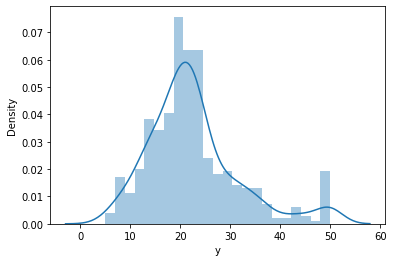

In [60]:
# 分布の確認
sns.distplot(df['y'])

<AxesSubplot:xlabel='y', ylabel='Count'>

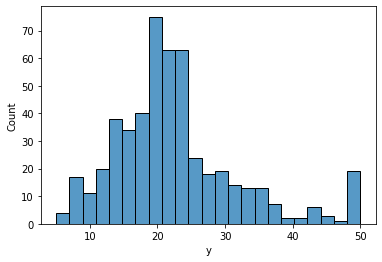

In [62]:
# 分布の確認
sns.histplot(df['y'])

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x1', ylabel='Density'>

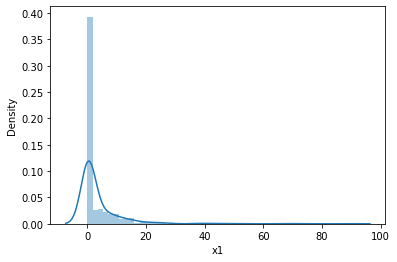

In [63]:
# 分布の確認
sns.distplot(df['x1'])

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='Density'>

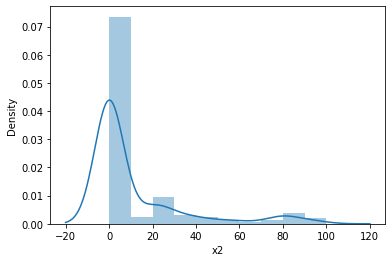

In [66]:
# 分布の確認 (binの幅)
sns.distplot(df['x2'], bins=10)

# 相関係数の算出

In [68]:
# 相関係数(correlation)の算出
df.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
x2,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
x3,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
x4,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
x5,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
x6,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
x7,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
x8,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
x9,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
x10,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


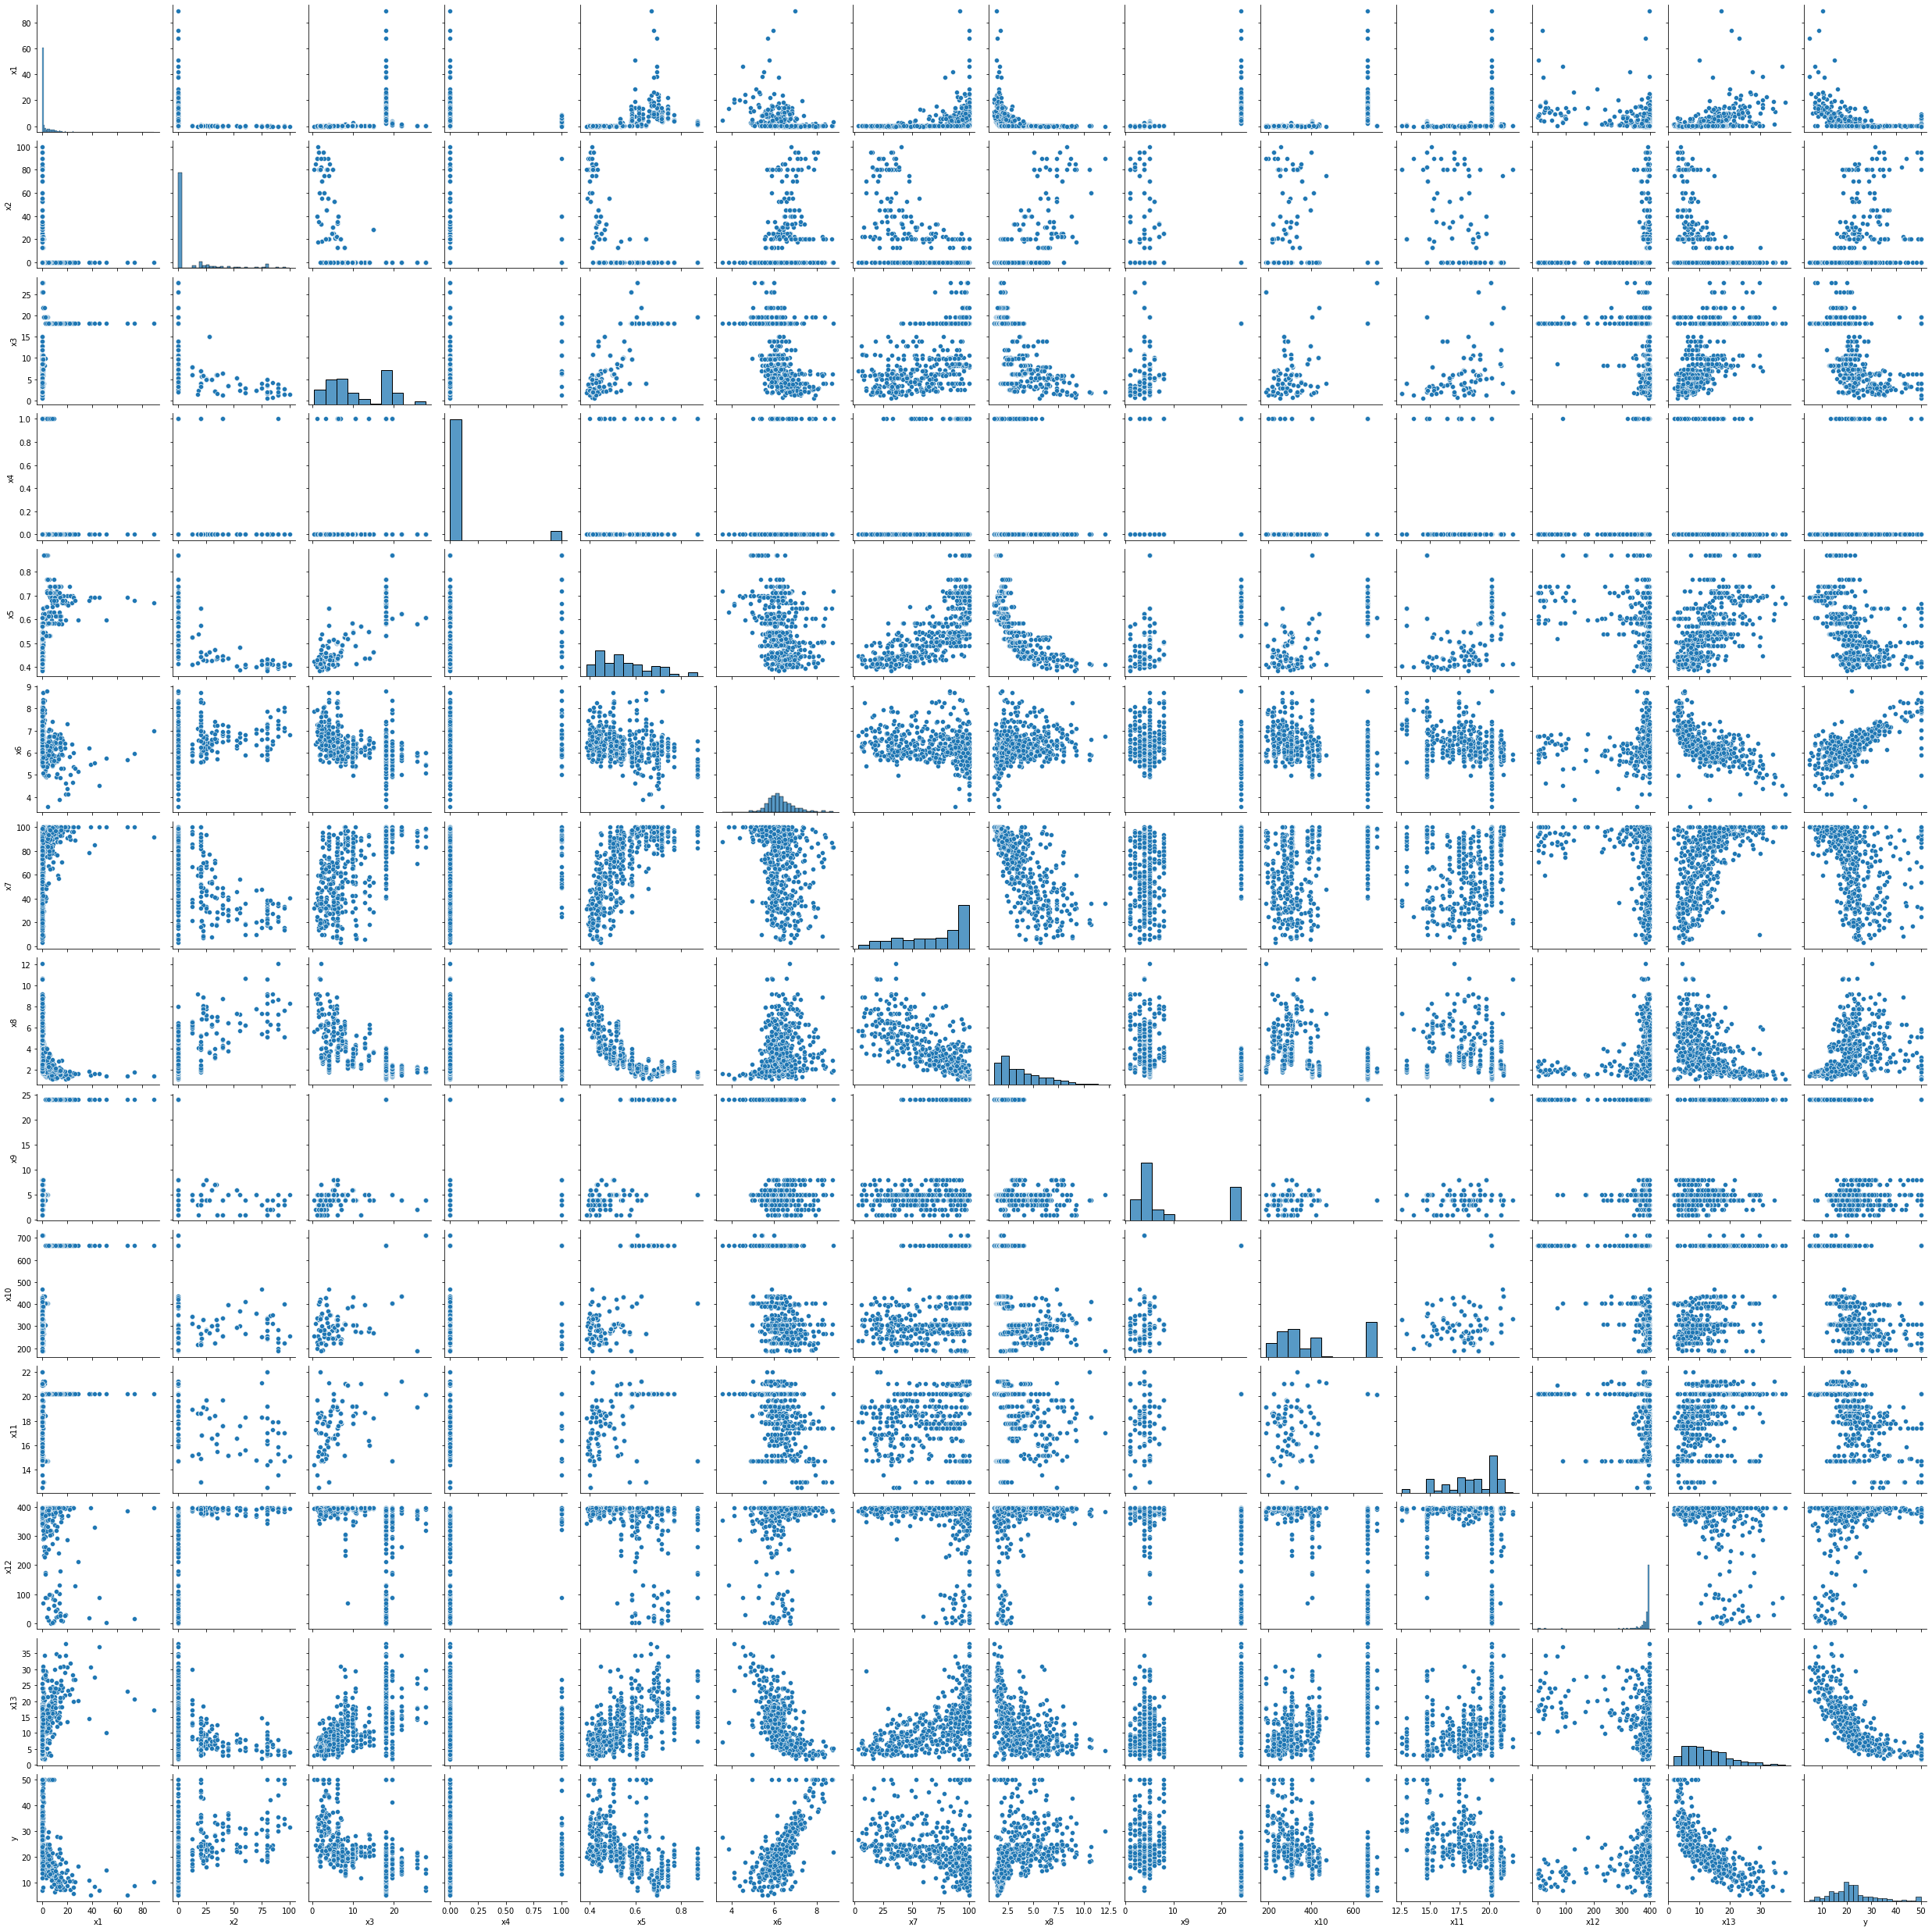

In [69]:
# 相関係数を目視で確認
sns.pairplot(df)

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

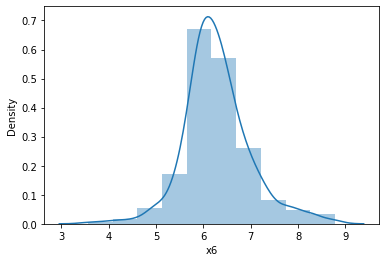

In [70]:
# 分布の確認 (binの幅)
sns.distplot(df['x6'], bins=10)

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x13', ylabel='Density'>

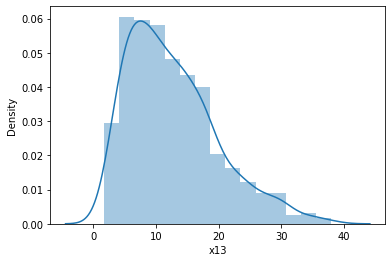

In [72]:
# 分布の確認 (binの幅)
sns.distplot(df['x13'])

# 入力変数と出力変数の切り分け

In [73]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
# df.iloc[行,列]
df.iloc[0,0]

0.00632

In [75]:
# df.iloc[行,列]
df.iloc[:,0]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: x1, Length: 506, dtype: float64

In [77]:
# df.iloc[行,列]
df.iloc[:,0:13]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [80]:
# df.iloc[行,列] 一番最後の手前まで
X = df.iloc[:,0:-1]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [83]:
y = df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 506, dtype: float64

# モデルの構築と検証 

In [85]:
from sklearn.linear_model import LinearRegression

# modelの宣言
model = LinearRegression()

# modelの学習
model.fit(X,y)
print(f'係数:{model.coef_}')
print(f'y切片:{model.intercept_}')

# 検証(決定係数の計算)
R2 = model.score(X,y)
print(f'決定係数{R2}')

係数:[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
y切片:36.45948838509008
決定係数0.7406426641094094


# 訓練データと検証データ

ダメなケース

- 受験勉強用に10年分の過去問を購入(学習)
- 10年分で実力テストを行う(検証)

良いケース

- 受験勉強用に5年分の過去問を購入(学習)
- 5年分で実力テストを行う(検証)

In [92]:
from sklearn.model_selection import train_test_split

# 訓練データと検証データの分割
train_test_split(X,y, test_size=0.4, random_state=1) #random_stateを固定

[          x1    x2     x3  x4     x5     x6    x7      x8  x9  x10   x11  \
 452  5.09017   0.0  18.10   0  0.713  6.297  91.8  2.3682  24  666  20.2   
 346  0.06162   0.0   4.39   0  0.442  5.898  52.3  8.0136   3  352  18.8   
 295  0.12932   0.0  13.92   0  0.437  6.678  31.1  5.9604   4  289  16.0   
 88   0.05660   0.0   3.41   0  0.489  7.007  86.3  3.4217   2  270  17.8   
 322  0.35114   0.0   7.38   0  0.493  6.041  49.9  4.7211   5  287  19.6   
 ..       ...   ...    ...  ..    ...    ...   ...     ...  ..  ...   ...   
 255  0.03548  80.0   3.64   0  0.392  5.876  19.1  9.2203   1  315  16.4   
 72   0.09164   0.0  10.81   0  0.413  6.065   7.8  5.2873   4  305  19.2   
 396  5.87205   0.0  18.10   0  0.693  6.405  96.0  1.6768  24  666  20.2   
 235  0.33045   0.0   6.20   0  0.507  6.086  61.5  3.6519   8  307  17.4   
 37   0.08014   0.0   5.96   0  0.499  5.850  41.5  3.9342   5  279  19.2   
 
         x12    x13  
 452  385.09  17.27  
 346  364.61  12.67  
 295  39

In [94]:
# 訓練データと検証データの分割
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.4, random_state=1) #random_stateを固定

In [95]:
# モデルの学習
model.fit(X_train, y_train)

LinearRegression()

In [96]:
# 検証 <-検証データ

model.score(X_test, y_test)

0.7209056672661769

In [99]:
# 検証 <-訓練データ

model.score(X_train, y_train)

0.7468316520140625

# 予測値の計算とモデルの保存 

In [111]:
# 1ケースだけ予測してみる
x = X.iloc[0,:]
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [105]:
# 予測値の計算
y_pred = model.predict([x])[0]
y_pred

29.4236884694056

In [104]:
y[0]

24.0

実際のyは24(予測値は29.4)

# モデルの保存

In [108]:
import joblib

In [109]:
# モデルの保存
joblib.dump(model, 'model.pkl')

['model.pkl']

# モデルの読み込み

In [110]:
model_new = joblib.load('model.pkl')
x

x1       0.00632
x2      18.00000
x3       2.31000
x4       0.00000
x5       0.53800
x6       6.57500
x7      65.20000
x8       4.09000
x9       1.00000
x10    296.00000
x11     15.30000
x12    396.90000
x13      4.98000
Name: 0, dtype: float64

In [114]:
model_new.predict([x])

array([29.42368847])

In [116]:
# 全ケースだけ予測してみる
model_new.predict(X)

array([29.42368847, 24.67589834, 29.95447417, 28.03904678, 27.41157074,
       24.85160986, 22.80526735, 19.53518285, 11.86055897, 18.96202095,
       19.03206133, 21.50406424, 20.74941001, 19.64551137, 19.39469296,
       19.38416494, 20.52739055, 17.10969386, 16.28659179, 18.51192676,
       12.90656862, 17.84135062, 16.08084935, 14.1550611 , 15.95442471,
       13.71149142, 15.75113971, 14.97788993, 19.6578733 , 20.90901803,
       11.8842283 , 18.23492365,  9.25490997, 14.57841871, 13.97300109,
       23.47269554, 22.04337535, 22.78926504, 22.57994348, 32.31111862,
       35.03740942, 27.47891053, 24.79190815, 24.22557021, 22.67026829,
       21.83159497, 20.22140822, 18.02490895,  9.48776646, 17.226662  ,
       21.48741401, 24.09088664, 27.56290313, 24.11092926, 17.26621047,
       32.52937967, 26.34628101, 34.41603975, 22.25545086, 21.57933645,
       18.53958574, 19.15713668, 24.39859206, 23.0192002 , 23.56325051,
       31.33254683, 26.72290735, 21.22723902, 17.71078622, 20.92

# パラメータの確認

In [117]:
# パラメータの確認
model.coef_

array([-8.95714048e-02,  6.73132853e-02,  5.04649248e-02,  2.18579583e+00,
       -1.72053975e+01,  3.63606995e+00,  2.05579939e-03, -1.36602886e+00,
        2.89576718e-01, -1.22700072e-02, -8.34881849e-01,  9.40360790e-03,
       -5.04008320e-01])

重みが大きいと影響が大きい

In [120]:
np.set_printoptions(precision=3, suppress=True) #指数関数の表示を禁止

In [121]:
model.coef_

array([ -0.09 ,   0.067,   0.05 ,   2.186, -17.205,   3.636,   0.002,
        -1.366,   0.29 ,  -0.012,  -0.835,   0.009,  -0.504])

In [122]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 統計学の基礎

機械学習.pdf参照

※スケールの大きさが違うので、重みを見るだけではどの変数が影響が大きいのかがわからない

# データの読み込み

In [124]:
import numpy as np
import pandas as pd

In [141]:
df = pd.read_csv('housing.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

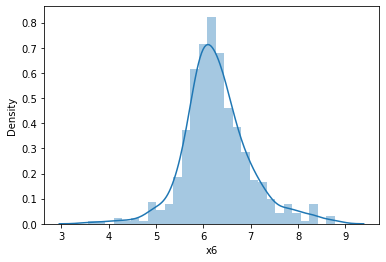

In [127]:
# 分布の確認
import seaborn as sns
sns.distplot(df['x6'])

# 外れ値の除去(3σ法）

In [132]:
# 平均
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [133]:
col = 'x6'
mean[col]

6.284634387351779

In [134]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [135]:
low = mean[col] -3 * sigma[col]
high = mean[col] +3 * sigma[col]

print(f'low = {low}')
print(f'high = {high}')

low = 4.176782957105809
high = 8.392485817597748


In [143]:
# 条件を絞る
df2 = df[(df[col]>low) & (df[col]<high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

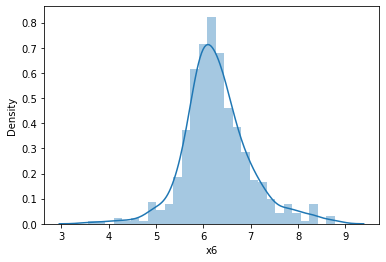

In [144]:
sns.distplot(df[col])

c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x6', ylabel='Density'>

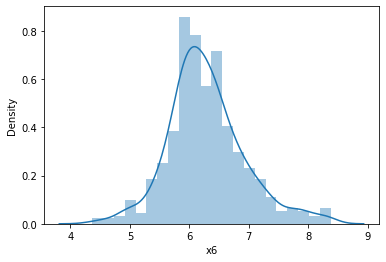

In [145]:
sns.distplot(df2[col])

low = -58.60372261990905
high = 81.33099534718177


c:\users\81801\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x2', ylabel='Density'>

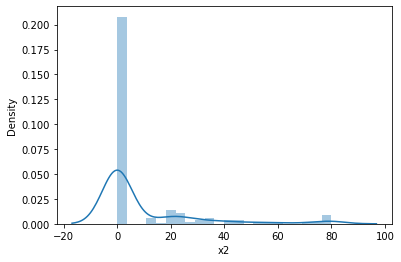

In [146]:
col = 'x2'
# 平均
mean = df.mean()

# 標準偏差(standard deviation)
sigma = df.std()

low = mean[col] -3 * sigma[col]
high = mean[col] +3 * sigma[col]

print(f'low = {low}')
print(f'high = {high}')

# 条件を絞る
df2 = df[(df[col]>low) & (df[col]<high)]
sns.distplot(df2[col])

In [147]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [148]:
for col in cols:
    print(col)

x1
x2
x3
x4
x5
x6
x7
x8
x9
x10
x11
x12
x13
y


In [150]:
_df = df
for col in cols:
    # 3σ法で上限値を設定->外れ値を除去する
#     col = 'x2'
    # 平均
    mean = df.mean()

    # 標準偏差(standard deviation)
    sigma = df.std()

    low = mean[col] -3 * sigma[col]
    high = mean[col] +3 * sigma[col]

    print(f'low = {low}')
    print(f'high = {high}')

    # 条件を絞る
    _df = _df[(_df[col]>low) & (_df[col]<high)]

low = -22.19111175868521
high = 29.41815887330972
low = -58.60372261990905
high = 81.33099534718177
low = -9.444280166566276
high = 31.717837478819238
low = -0.6928121635469228
high = 0.8311520844955395
low = 0.20706203228586972
high = 0.9023280862912054
low = 4.176782957105809
high = 8.392485817597748
low = -15.87168303494009
high = 153.0214854064816
low = -2.5220876921357966
high = 10.112173067629868
low = -16.572371038093593
high = 35.67118526734261
low = -97.37419401467946
high = 913.8485023150747
low = 11.960697025694623
high = 24.95037016798127
low = 82.78943846807994
high = 630.5586247730268
low = -8.770121292938992
high = 34.07624777515244
low = -5.058505938028777
high = 50.124118586250134


In [152]:
# 3σ法の適用後
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


分布が正規分に従っていることを仮定しているので減らしすぎる可能性がある

対処法

- 外れ値を取り除く
- 外れ値を平均もしくは中央値で埋める
- 主成分分析等を使って、洗剤変数に変換した後に3σ法を適用<-高度

# モデルの構築
## 入力変数と出力変数に分割

In [153]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [159]:
# 説明変数
X = _df.iloc[:,0:-1]
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [158]:
y = _df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: y, Length: 415, dtype: float64

In [160]:
# 訓練データと検証データに分ける
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4, random_state=1)

In [161]:
# 重回帰分析
from sklearn.linear_model import LinearRegression

# modelの設定
model = LinearRegression()

# modelの学習
model.fit(X_train, y_train)

# 検証(決定係数の計算）
print(f'検証データ->{model.score(X_test, y_test)}')

# 検証(決定係数の計算）
print(f'訓練データ->{model.score(X_train, y_train)}')

検証データ->0.6253776004329576
訓練データ->0.7972109224535134


過学習(オーバーフィッティング）

# スケーリング

In [162]:
from sklearn.preprocessing import StandardScaler

In [164]:
# scalerの宣言
scaler = StandardScaler()

In [166]:
# scalerの学習 <-平均と標準偏差の計算
scaler.fit(X_train)

StandardScaler()

In [168]:
scaler.mean_

array([  2.406,   8.715,  10.908,   0.   ,   0.548,   6.285,  67.285,
         3.871,   8.675, 394.084,  18.414, 373.724,  12.222])

In [167]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [169]:
X_train2

array([[-0.45 , -0.471, -0.015, ...,  0.372,  0.067, -0.734],
       [-0.454, -0.471, -0.739, ...,  0.372,  0.381, -0.328],
       [-0.2  , -0.471,  1.295, ..., -1.755, -0.182, -0.757],
       ...,
       [ 0.494, -0.471,  1.074, ...,  0.844,  0.28 , -0.121],
       [-0.457,  0.61 , -0.589, ...,  0.088,  0.448, -0.883],
       [-0.473, -0.471, -0.739, ...,  0.372,  0.448, -0.541]])

In [170]:
# modelの宣言
model = LinearRegression()

# modelの学習
model.fit(X_train2, y_train)

# 検証<-検証データ（標準化）
model.score(X_test2, y_test)

0.6253776004329596

In [171]:
# 重みの確認
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

# 機械学習で必要な知識

- 数学
- 機械学習
- プログラミング

## 全体の流れ

- 課題設定、定式化
- 環境構築
- データ整理（データベース、教師データ作成）
- 非構造化->構造化
- ここまでで前処理
- モデルの構築
- 仮運用・検証（明日からの予測）
- システム統合
- アプリケーション作成
- プレゼンテーション